# ĐỀ THI THỬ NHẬP MÔN AI

In [ ]:
#MSSV: 2374802010352
#HỌ VÀ TÊN: TRẦN NHẬT NGUYÊN

# CÂU 1: TÌM DFS THEO ĐỒ THỊ BÊN DƯỚI BẰNG PYTHON

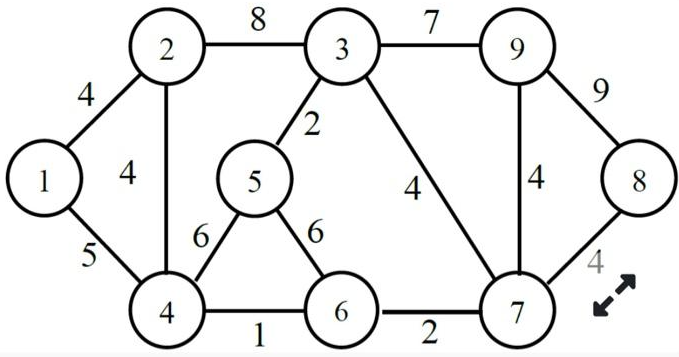

In [1]:
#CODE HERE
import heapq

def dijkstra(graph, start, goal):
    dist = {node: float('infinity') for node in graph}
    prev = {node: None for node in graph}
    dist[start] = 0
    priority_queue = [(0, start)]  

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        if current_distance > dist[current_node]:
            continue

        if current_node == goal:
            path = []
            while current_node is not None:
                path.insert(0, current_node)
                current_node = prev[current_node]
            return path, dist[goal]

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            if distance < dist[neighbor]:
                dist[neighbor] = distance
                prev[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return None, float('infinity')

# Định nghĩa Đồ thị theo hình ảnh (có trọng số)
graph_from_image = {
    1: [(2, 4), (4, 5)],
    2: [(1, 4), (3, 8), (4, 4)],
    3: [(2, 8), (5, 2), (7, 4), (9, 7)],
    4: [(1, 5), (2, 4), (5, 6), (6, 1)],
    5: [(3, 2), (4, 6), (6, 6)],
    6: [(4, 1), (5, 6), (7, 2)],
    7: [(3, 4), (6, 2), (8, 4), (9, 4)],
    8: [(7, 4), (9, 9)],
    9: [(3, 7), (7, 4), (8, 9)]
}

shortest_path, shortest_weight = dijkstra(graph_from_image, 1, 9)

if shortest_path:
    print("Đường đi ngắn nhất từ 1 đến 9 là:", shortest_path, "Tổng trọng số:", shortest_weight)
else:
    print("Không tìm thấy đường đi từ 1 đến 9.")

Đường đi ngắn nhất từ 1 đến 9 là: [1, 4, 6, 7, 9] Tổng trọng số: 12


# CÂU 2: Tối ưu hóa hàm một biến

Tìm $x$ sao cho  
$$
f(x) = -(x^2) + 10x + 50
$$  
đạt giá trị lớn nhất trong khoảng  
$$
x \in [0, 10].
$$

Thế hệ 1: x = 4.9043, f(x) = 74.9908
Thế hệ 2: x = 4.9993, f(x) = 74.9908
Thế hệ 3: x = 4.9993, f(x) = 75.0000
Thế hệ 4: x = 4.9971, f(x) = 75.0000
Thế hệ 5: x = 5.0006, f(x) = 75.0000
Thế hệ 6: x = 4.9999, f(x) = 75.0000
Thế hệ 7: x = 4.9999, f(x) = 75.0000
Thế hệ 8: x = 5.0001, f(x) = 75.0000
Thế hệ 9: x = 5.0000, f(x) = 75.0000
Thế hệ 10: x = 5.0000, f(x) = 75.0000
Thế hệ 11: x = 5.0000, f(x) = 75.0000
Thế hệ 12: x = 5.0000, f(x) = 75.0000
Thế hệ 13: x = 5.0000, f(x) = 75.0000
Thế hệ 14: x = 5.0000, f(x) = 75.0000
Thế hệ 15: x = 5.0000, f(x) = 75.0000
Thế hệ 16: x = 5.0000, f(x) = 75.0000
Thế hệ 17: x = 5.0000, f(x) = 75.0000
Thế hệ 18: x = 5.0000, f(x) = 75.0000
Thế hệ 19: x = 5.0000, f(x) = 75.0000
Thế hệ 20: x = 5.0000, f(x) = 75.0000
Thế hệ 21: x = 5.0000, f(x) = 75.0000
Thế hệ 22: x = 5.0000, f(x) = 75.0000
Thế hệ 23: x = 5.0000, f(x) = 75.0000
Thế hệ 24: x = 5.0000, f(x) = 75.0000
Thế hệ 25: x = 5.0000, f(x) = 75.0000
Thế hệ 26: x = 5.0000, f(x) = 75.0000
Thế hệ 27: x = 5.0000

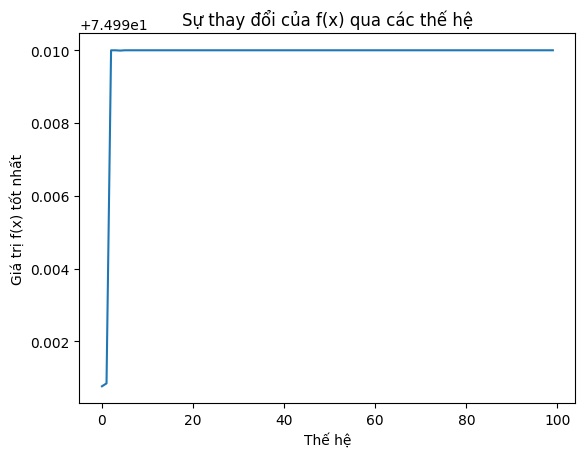


Kết quả cuối cùng: x = 5.0000, f(x) = 75.0000


In [2]:
# CODE HERE
import numpy as np
import random
import matplotlib.pyplot as plt

# Hàm mục tiêu
def fitness_function(x):
    return -(x**2) + 10*x + 50

# Khởi tạo quần thể
def initialize_population(pop_size, min_val, max_val):
    return [random.uniform(min_val, max_val) for _ in range(pop_size)]

# Lựa chọn (Tournament Selection)
def select_parents(population, fitness_values, tournament_size=3):
    selected = random.sample(range(len(population)), tournament_size)
    best_idx = max(selected, key=lambda i: fitness_values[i])
    return population[best_idx]

# Lai ghép
def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        return (parent1 + parent2) / 2
    return parent1

# Đột biến
def mutate(individual, mutation_rate=0.1, min_val=0, max_val=10):
    if random.random() < mutation_rate:
        return random.uniform(min_val, max_val)
    return individual

# Thuật toán di truyền
def genetic_algorithm_example1(pop_size=50, generations=100, min_val=0, max_val=10):
    population = initialize_population(pop_size, min_val, max_val)
    best_fitness_history = []
    
    for generation in range(generations):
        fitness_values = [fitness_function(x) for x in population]
        best_fitness = max(fitness_values)
        best_fitness_history.append(best_fitness)
        
        new_population = []
        for _ in range(pop_size):
            parent1 = select_parents(population, fitness_values)
            parent2 = select_parents(population, fitness_values)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population
        best_individual = population[np.argmax([fitness_function(x) for x in population])]
        print(f'Thế hệ {generation + 1}: x = {best_individual:.4f}, f(x) = {best_fitness:.4f}')
    
    best_fitness = max([fitness_function(x) for x in population])
    best_individual = population[np.argmax([fitness_function(x) for x in population])]
    
    # Trực quan hóa
    plt.plot(range(generations), best_fitness_history)
    plt.xlabel('Thế hệ')
    plt.ylabel('Giá trị f(x) tốt nhất')
    plt.title('Sự thay đổi của f(x) qua các thế hệ')
    plt.show()
    
    return best_individual, best_fitness

# Chạy thuật toán
best_x, best_f = genetic_algorithm_example1()
print(f'\nKết quả cuối cùng: x = {best_x:.4f}, f(x) = {best_f:.4f}')

# CÂU 3: SỬ DỤNG MÔ HÌNH CNN ĐỂ PHÂN LOẠI DỮ LIỆU CHÓ VÀ MÈO TỪ DATA: 

https://www.kaggle.com/c/dogs-vs-cats/data

Training samples: 20000
Test samples: 5000
Using device: cuda
Epoch 1, Loss: 0.5834, Accuracy: 68.92%
Epoch 2, Loss: 0.4535, Accuracy: 78.70%
Epoch 3, Loss: 0.3881, Accuracy: 82.45%
Epoch 4, Loss: 0.3156, Accuracy: 86.02%
Epoch 5, Loss: 0.2332, Accuracy: 90.21%

Test Accuracy: 82.76%


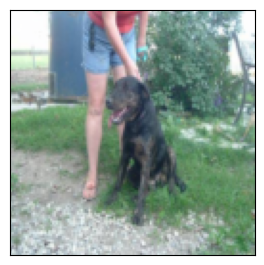

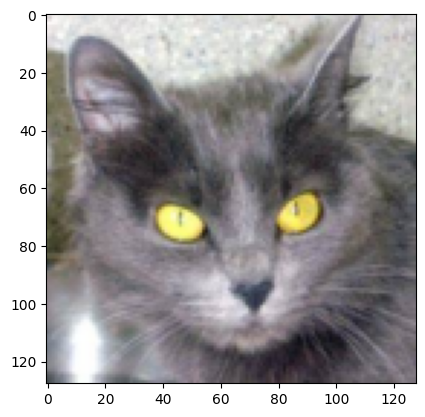

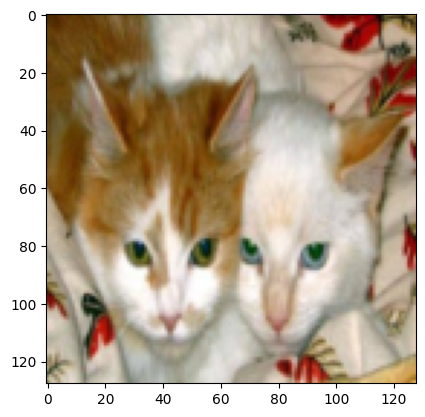

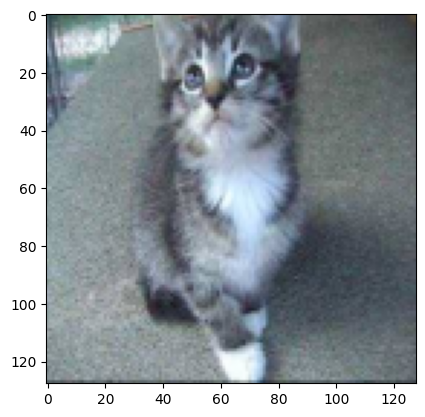

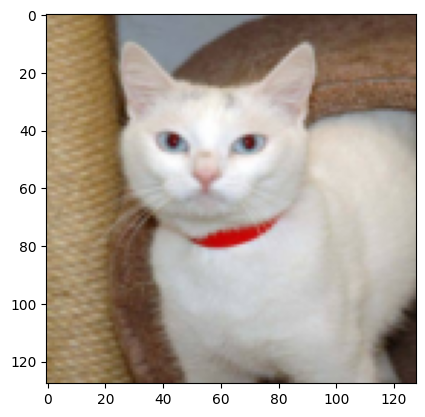

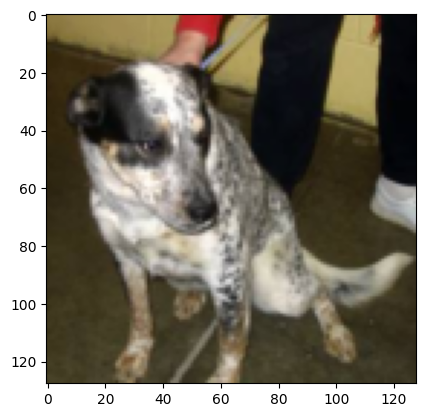

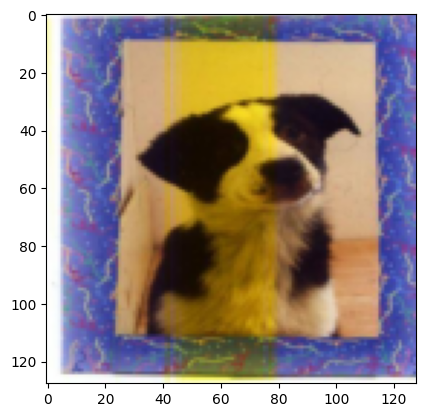

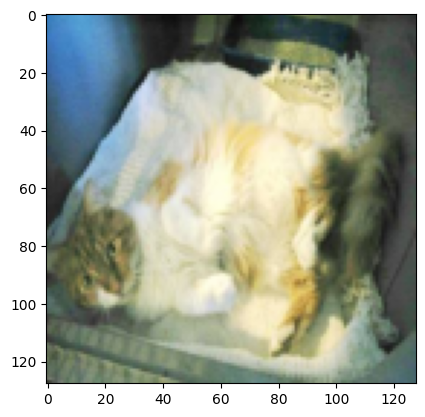

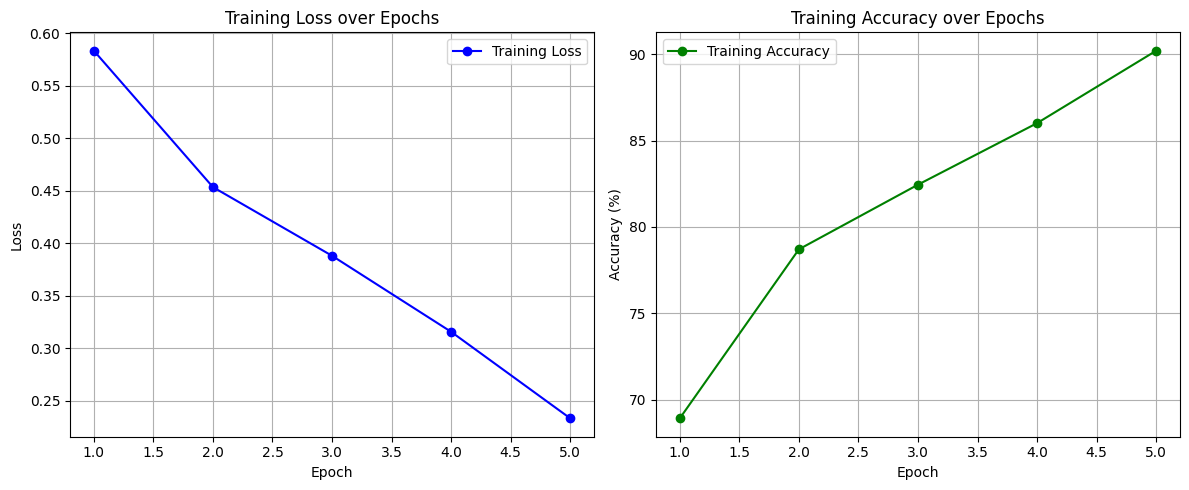

In [4]:
#CODE HERE
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# 1. Tạo custom dataset cho Dogs vs Cats
class DogsVsCatsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        
        # Tìm tất cả file ảnh trong thư mục train
        self.image_paths = []
        self.labels = []
        
        # Tìm file trong train/train folder
        train_path = os.path.join(data_dir, 'train', 'train')
        if os.path.exists(train_path):
            for img_file in os.listdir(train_path):
                if img_file.endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(train_path, img_file)
                    self.image_paths.append(img_path)
                    
                    # Xác định label: 0 cho cat, 1 cho dog
                    if img_file.startswith('cat'):
                        self.labels.append(0)
                    elif img_file.startswith('dog'):
                        self.labels.append(1)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Transform cho ảnh: resize về 128x128, chuyển thành tensor và normalize
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Tải dữ liệu Dogs vs Cats
# **Lưu ý:** Hãy chắc chắn rằng bạn đã tải và giải nén dataset vào thư mục './dogs-vs-cats'
# Dataset có thể tải từ: https://www.kaggle.com/c/dogs-vs-cats/data
try:
    dataset = DogsVsCatsDataset('./dogs-vs-cats', transform=transform)
    if len(dataset) == 0:
        print("Không tìm thấy dữ liệu. Vui lòng kiểm tra lại đường dẫn './dogs-vs-cats/train/train'")
    else:
        # Chia dataset thành train và test (80-20)
        train_size = int(0.8 * len(dataset))
        test_size = len(dataset) - train_size
        train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        print(f"Training samples: {len(train_dataset)}")
        print(f"Test samples: {len(test_dataset)}")

except FileNotFoundError:
    print("Thư mục 'dogs-vs-cats' không tồn tại. Vui lòng tải và giải nén dữ liệu.")

# 2. Định nghĩa mô hình CNN cho Dogs vs Cats
class DogsCatsCNN(nn.Module):
    def __init__(self):
        super(DogsCatsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Khởi tạo mô hình
model = DogsCatsCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Huấn luyện mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Using device: {device}")

loss_values = []
accuracy_values = []

if 'train_loader' in locals(): # Chỉ huấn luyện nếu dữ liệu đã được tải thành công
    for epoch in range(5):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        loss_values.append(epoch_loss)
        accuracy_values.append(epoch_accuracy)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# 4. Đánh giá mô hình trên tập test
if 'test_loader' in locals(): # Chỉ đánh giá nếu có test_loader
    model.eval()
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# ===================================================================
# 5. HIỂN THỊ KẾT QUẢ DỰ ĐOÁN (ĐOẠN CODE ĐƯỢC THÊM)
# ===================================================================
def imshow(inp, title=None):
    """Hàm để hiển thị ảnh tensor"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

if 'test_loader' in locals(): # Chỉ chạy nếu có test_loader
    # Lấy một batch dữ liệu từ tập test
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)

    # Đưa ảnh qua mô hình để dự đoán
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    
    # Định nghĩa tên lớp
    class_names = ['cat', 'dog']

    # Hiển thị 8 ảnh đầu tiên trong batch cùng với dự đoán
    fig = plt.figure(figsize=(15, 7))
    for idx in np.arange(8):
        ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
        # Chuyển ảnh về CPU để hiển thị
        imshow(images.cpu()[idx])
        # Đặt tiêu đề cho ảnh là dự đoán (nhãn thật)
        ax.set_title(f"Pred: {class_names[preds[idx]]} (True: {class_names[labels[idx]]})",
                     color=("green" if preds[idx]==labels[idx] else "red"))
    plt.show()

# 6. Vẽ biểu đồ Loss và Accuracy
if loss_values and accuracy_values: # Chỉ vẽ nếu có dữ liệu
    plt.figure(figsize=(12, 5))

    # Biểu đồ Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # Biểu đồ Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o', color='g', label='Training Accuracy')
    plt.title('Training Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# CÂU 4: SỬ DỤNG NAIVE BAYES CHO TẬP DỮ LIỆU SAU: 

| Day | Outlook  | Temperature | Humidity | Wind  | Play |
|-----|----------|-------------|----------|-------|------|
| 1   | Sunny    | Hot         | High     | False | No   |
| 2   | Sunny    | Hot         | High     | True  | No   |
| 3   | Overcast | Hot         | High     | False | Yes  |
| 4   | Rainy    | Mild        | High     | False | Yes  |
| 5   | Rainy    | Cool        | Normal   | False | Yes  |
| 6   | Rainy    | Cool        | Normal   | True  | No   |
| 7   | Overcast | Cool        | Normal   | True  | Yes  |
| 8   | Sunny    | Mild        | High     | False | No   |
| 9   | Sunny    | Cool        | Normal   | False | Yes  |
| 10  | Rainy    | Mild        | Normal   | False | Yes  |
| 11  | Sunny    | Mild        | Normal   | True  | Yes  |
| 12  | Overcast | Mild        | High     | True  | Yes  |
| 13  | Overcast | Hot         | Normal   | False | Yes  |
| 14  | Rainy    | Mild        | High     | True  | No   |

YÊU CẦU : Xây dựng mô hình Naive Bayes để dự đoán nhãn Play (Yes/No) dựa trên các đặc trưng: Outlook, Temperature, Humidity, và Wind

Dữ liệu gốc:
   Day   Outlook Temperature Humidity   Wind Play
0    1     Sunny         Hot     High  False   No
1    2     Sunny         Hot     High   True   No
2    3  Overcast         Hot     High  False  Yes
3    4     Rainy        Mild     High  False  Yes
4    5     Rainy        Cool   Normal  False  Yes

Kích thước dữ liệu: (14, 6)

Thông tin về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     int64 
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     object
 3   Humidity     14 non-null     object
 4   Wind         14 non-null     bool  
 5   Play         14 non-null     object
dtypes: bool(1), int64(1), object(4)
memory usage: 706.0+ bytes
None

Dữ liệu thiếu:
Day            0
Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

Phân

c:\Users\Fubuki\.conda\envs\ai_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Fubuki\.conda\envs\ai_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Fubuki\.conda\envs\ai_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

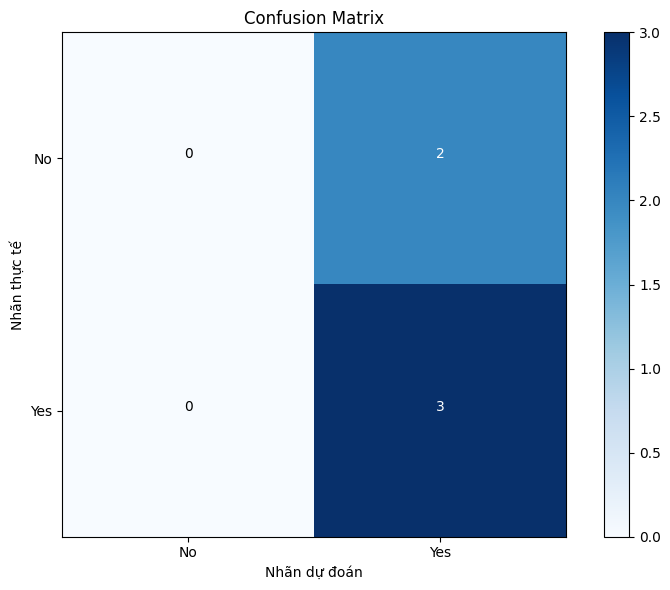


THỰC HIỆN DỰ ĐOÁN VỚI DỮ LIỆU MỚI

Dữ liệu mới cần dự đoán:
    Outlook Temperature Humidity   Wind
0     Sunny         Hot     High  False
1  Overcast        Mild   Normal   True
2     Rainy        Cool   Normal  False

Dữ liệu mới sau khi mã hóa:
   Outlook  Temperature  Humidity  Wind
0        2            1         0     0
1        0            2         1     1
2        1            0         1     0

Kết quả dự đoán:
Trường hợp 1: Dự đoán = Yes, Xác suất = [0.36548223 0.63451777]
  Điều kiện: {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': False}

Trường hợp 2: Dự đoán = Yes, Xác suất = [0.20382166 0.79617834]
  Điều kiện: {'Outlook': 'Overcast', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': True}

Trường hợp 3: Dự đoán = Yes, Xác suất = [0.10329986 0.89670014]
  Điều kiện: {'Outlook': 'Rainy', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': False}


Kết quả dự đoán:
Trường hợp 1: Dự đoán = Yes, Xác suất = [0.36548223 0.63451777]
  Điều kiện: {

In [2]:
#CODE HERE
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv('./weather.csv')
print("Dữ liệu gốc:")
print(data.head())
print(f"\nKích thước dữ liệu: {data.shape}")
print(f"\nThông tin về dữ liệu:")
print(data.info())

# 2. Kiểm tra dữ liệu thiếu
print(f"\nDữ liệu thiếu:")
print(data.isnull().sum())

# 3. Phân tích phân phối nhãn
print(f"\nPhân phối nhãn Play:")
print(data['Play'].value_counts())

# 4. Chuẩn bị dữ liệu - Mã hóa các biến categorical
# Tạo bản sao để xử lý
data_encoded = data.copy()

# Sử dụng LabelEncoder để mã hóa các biến categorical
label_encoders = {}
categorical_columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"\nMã hóa {col}:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

# Mã hóa biến mục tiêu Play
target_encoder = LabelEncoder()
data_encoded['Play'] = target_encoder.fit_transform(data['Play'])
print(f"\nMã hóa Play:")
for i, label in enumerate(target_encoder.classes_):
    print(f"  {label} -> {i}")

print(f"\nDữ liệu sau khi mã hóa:")
print(data_encoded.head())

# 5. Chia dữ liệu thành features và target
X = data_encoded[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = data_encoded['Play']

print(f"\nFeatures (X):")
print(X.head())
print(f"\nTarget (y):")
print(y.head())

# 6. Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nKích thước tập train: {len(X_train)}")
print(f"Kích thước tập test: {len(X_test)}")
print(f"\nPhân phối nhãn trong tập train:")
print(pd.Series(y_train).value_counts())
print(f"\nPhân phối nhãn trong tập test:")
print(pd.Series(y_test).value_counts())

# 7. Xây dựng mô hình Naive Bayes
# Sử dụng CategoricalNB cho dữ liệu categorical
model = CategoricalNB()
model.fit(X_train, y_train)

print(f"\nMô hình Naive Bayes đã được huấn luyện!")

# 8. Dự đoán trên tập test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"\nDự đoán:")
print(f"Nhãn thực tế: {y_test.values}")
print(f"Nhãn dự đoán: {y_pred}")

# Chuyển đổi về nhãn gốc để dễ đọc
y_test_labels = target_encoder.inverse_transform(y_test)
y_pred_labels = target_encoder.inverse_transform(y_pred)

print(f"\nDự đoán với nhãn gốc:")
for i, (true_label, pred_label, prob) in enumerate(zip(y_test_labels, y_pred_labels, y_pred_proba)):
    print(f"Mẫu {i+1}: Thực tế={true_label}, Dự đoán={pred_label}, Xác suất={prob}")

# 9. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

# Classification Report
print(f"\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# 10. Tính toán các metrics chi tiết
tn, fp, fn, tp = cm.ravel()
print(f"\nCác metrics chi tiết:")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

# 11. Vẽ biểu đồ Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_encoder.classes_))
plt.xticks(tick_marks, target_encoder.classes_)
plt.yticks(tick_marks, target_encoder.classes_)

# Thêm text vào các ô
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.tight_layout()
plt.show()

# 12. Thử dự đoán với dữ liệu mới
print(f"\n" + "="*50)
print("THỰC HIỆN DỰ ĐOÁN VỚI DỮ LIỆU MỚI")
print("="*50)

# Ví dụ dự đoán với điều kiện mới
new_data = pd.DataFrame({
    'Outlook': ['Sunny', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Mild', 'Cool'],
    'Humidity': ['High', 'Normal', 'Normal'],
    'Wind': [False, True, False]
})

print(f"\nDữ liệu mới cần dự đoán:")
print(new_data)

# Mã hóa dữ liệu mới
new_data_encoded = new_data.copy()
for col in categorical_columns:
    new_data_encoded[col] = label_encoders[col].transform(new_data[col])

print(f"\nDữ liệu mới sau khi mã hóa:")
print(new_data_encoded)

# Dự đoán
new_predictions = model.predict(new_data_encoded)
new_predictions_proba = model.predict_proba(new_data_encoded)
new_predictions_labels = target_encoder.inverse_transform(new_predictions)

print(f"\nKết quả dự đoán:")
for i, (pred_label, prob) in enumerate(zip(new_predictions_labels, new_predictions_proba)):
    print(f"Trường hợp {i+1}: Dự đoán = {pred_label}, Xác suất = {prob}")
    print(f"  Điều kiện: {new_data.iloc[i].to_dict()}")
    print()